# Assignment-10- Given a Kaggle song lyrics dataset, generate songs by training a deep learning model. Specifically, train the following models: Long short-term memory (LSTM), bidirectional LSTM, one-dimension (1D) ConvNet, Gated Recurrent Unit (GRU), and deep bidirectional LSTM


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd
import tensorflow.keras.utils as ku 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU
from keras.layers import Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from google. colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']
  return corpus
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

In [31]:
# Read the dataset from csv 
dataset = pd.read_csv('/songdata.csv', dtype=str)
# Create the corpus using the 'text' column containing lyrics only
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=2000)
total_words = tokenizer.num_words

# There should be 2000 words as per the dataset
print(total_words)


2000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels(changing text to numbers)
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [34]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

31
158
[  0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206  29
   4]
[   0    0    0    0    0    0    0    0    0    0    0    0  111   66
   86  206   29    4 1196]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


# LSTM MODEL

In [35]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_LSTM.add(LSTM(20))
model_LSTM.add(Dense(total_words, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_LSTM = model_LSTM.fit(input_sequences, one_hot_labels, epochs=50, verbose=1)

Epoch 1/50
1480/1480 [==============================] - 20s 12ms/step - loss: 6.0293 - accuracy: 0.0450
Epoch 2/50
1480/1480 [==============================] - 19s 13ms/step - loss: 5.7651 - accuracy: 0.0483
Epoch 3/50
1480/1480 [==============================] - 18s 12ms/step - loss: 5.6303 - accuracy: 0.0507
Epoch 4/50
1480/1480 [==============================] - 18s 12ms/step - loss: 5.4540 - accuracy: 0.0640
Epoch 5/50
1480/1480 [==============================] - 18s 12ms/step - loss: 5.2826 - accuracy: 0.0917
Epoch 6/50
1480/1480 [==============================] - 18s 12ms/step - loss: 5.1400 - accuracy: 0.1125
Epoch 7/50
1480/1480 [==============================] - 18s 12ms/step - loss: 5.0026 - accuracy: 0.1298
Epoch 8/50
1480/1480 [==============================] - 18s 12ms/step - loss: 4.8731 - accuracy: 0.1403
Epoch 9/50
1480/1480 [==============================] - 18s 12ms/step - loss: 4.7518 - accuracy: 0.1526
Epoch 10/50
1480/1480 [==============================] - 18s 12m

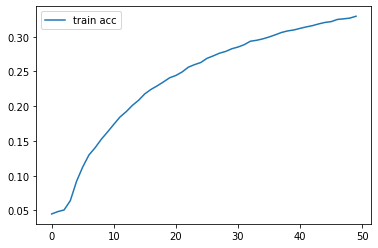

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the accuracy for LTSM
plt.plot(history_LSTM.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Bidirectional - LSTM

In [37]:
model_BL = Sequential()
model_BL.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_BL.add(Bidirectional(LSTM(20)))
model_BL.add(Dense(total_words, activation='softmax'))
model_BL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_BL = model_BL.fit(input_sequences, one_hot_labels, epochs=50, verbose=1)

Epoch 1/50
1480/1480 [==============================] - 28s 17ms/step - loss: 5.9864 - accuracy: 0.0465
Epoch 2/50
1480/1480 [==============================] - 25s 17ms/step - loss: 5.6851 - accuracy: 0.0524
Epoch 3/50
1480/1480 [==============================] - 25s 17ms/step - loss: 5.4690 - accuracy: 0.0694
Epoch 4/50
1480/1480 [==============================] - 25s 17ms/step - loss: 5.2661 - accuracy: 0.1028
Epoch 5/50
1480/1480 [==============================] - 25s 17ms/step - loss: 5.0588 - accuracy: 0.1231
Epoch 6/50
1480/1480 [==============================] - 26s 17ms/step - loss: 4.8749 - accuracy: 0.1390
Epoch 7/50
1480/1480 [==============================] - 25s 17ms/step - loss: 4.7078 - accuracy: 0.1568
Epoch 8/50
1480/1480 [==============================] - 25s 17ms/step - loss: 4.5629 - accuracy: 0.1738
Epoch 9/50
1480/1480 [==============================] - 25s 17ms/step - loss: 4.4359 - accuracy: 0.1874
Epoch 10/50
1480/1480 [==============================] - 25s 17m

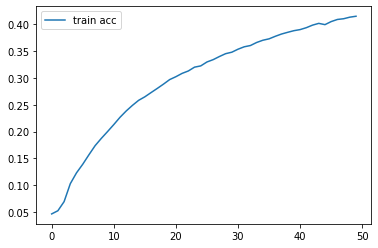

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the accuracy for Bidirectional LTSM
plt.plot(history_BL.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Deep Bidirectional

In [41]:
model_DB = Sequential()
model_DB.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_DB.add(Bidirectional(LSTM(20, return_sequences=True)))
model_DB.add(Bidirectional(LSTM(20)))
model_DB.add(Dense(total_words, activation='softmax'))
model_DB.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_DB = model_DB.fit(input_sequences, one_hot_labels, epochs=50, verbose=1)

Epoch 1/50
1480/1480 [==============================] - 86s 29ms/step - loss: 5.9653 - accuracy: 0.0478
Epoch 2/50
1480/1480 [==============================] - 42s 29ms/step - loss: 5.6123 - accuracy: 0.0545
Epoch 3/50
1480/1480 [==============================] - 41s 28ms/step - loss: 5.4731 - accuracy: 0.0612
Epoch 4/50
1480/1480 [==============================] - 41s 28ms/step - loss: 5.3466 - accuracy: 0.0706
Epoch 5/50
1480/1480 [==============================] - 41s 28ms/step - loss: 5.2168 - accuracy: 0.0799
Epoch 6/50
1480/1480 [==============================] - 42s 28ms/step - loss: 5.0899 - accuracy: 0.0926
Epoch 7/50
1480/1480 [==============================] - 41s 28ms/step - loss: 4.9748 - accuracy: 0.1092
Epoch 8/50
1480/1480 [==============================] - 42s 28ms/step - loss: 4.8670 - accuracy: 0.1234
Epoch 9/50
1480/1480 [==============================] - 41s 28ms/step - loss: 4.7579 - accuracy: 0.1338
Epoch 10/50
1480/1480 [==============================] - 41s 28m

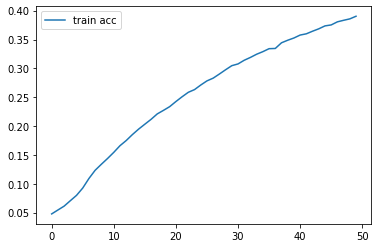

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the accuracy for Deep Bidirectional LTSM
plt.plot(history_DB.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# RNN GRU

In [43]:
model_GRU = Sequential()
model_GRU.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_GRU.add(GRU(20))
model_GRU.add(Dense(total_words, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_GRU = model_GRU.fit(input_sequences, one_hot_labels, epochs=50, verbose=1)

Epoch 1/50
1480/1480 [==============================] - 22s 14ms/step - loss: 6.0123 - accuracy: 0.0473
Epoch 2/50
1480/1480 [==============================] - 20s 14ms/step - loss: 5.6105 - accuracy: 0.0588
Epoch 3/50
1480/1480 [==============================] - 20s 14ms/step - loss: 5.3695 - accuracy: 0.0846
Epoch 4/50
1480/1480 [==============================] - 20s 14ms/step - loss: 5.1423 - accuracy: 0.1174
Epoch 5/50
1480/1480 [==============================] - 20s 13ms/step - loss: 4.9500 - accuracy: 0.1350
Epoch 6/50
1480/1480 [==============================] - 20s 13ms/step - loss: 4.7877 - accuracy: 0.1503
Epoch 7/50
1480/1480 [==============================] - 20s 13ms/step - loss: 4.6513 - accuracy: 0.1630
Epoch 8/50
1480/1480 [==============================] - 20s 13ms/step - loss: 4.5367 - accuracy: 0.1742
Epoch 9/50
1480/1480 [==============================] - 20s 13ms/step - loss: 4.4400 - accuracy: 0.1824
Epoch 10/50
1480/1480 [==============================] - 20s 13m

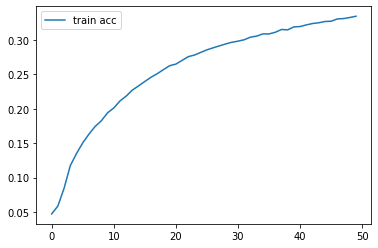

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the accuracy for RNN GRU
plt.plot(history_GRU.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# one-dimension (1D) ConvNet

In [46]:
model_1D = Sequential()
model_1D.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_1D.add(Conv1D(25, 3,activation='softmax'))
model_1D.add(Conv1D(25, 3,activation='softmax'))
model_1D.add(Conv1D(20, 3,activation='softmax'))
model_1D.add(GlobalMaxPooling1D())
model_1D.add(Dense(total_words, activation='softmax'))

In [47]:
model_1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history_1D = model_1D.fit(input_sequences, one_hot_labels, epochs=50, verbose=1)

Epoch 1/50
1480/1480 [==============================] - 13s 8ms/step - loss: 6.5547 - accuracy: 0.0435
Epoch 2/50
1480/1480 [==============================] - 12s 8ms/step - loss: 6.0207 - accuracy: 0.0469
Epoch 3/50
1480/1480 [==============================] - 11s 8ms/step - loss: 5.9852 - accuracy: 0.0470
Epoch 4/50
1480/1480 [==============================] - 11s 8ms/step - loss: 5.9615 - accuracy: 0.0476
Epoch 5/50
1480/1480 [==============================] - 11s 8ms/step - loss: 5.9425 - accuracy: 0.0486
Epoch 6/50
1480/1480 [==============================] - 13s 9ms/step - loss: 5.9215 - accuracy: 0.0491
Epoch 7/50
1480/1480 [==============================] - 11s 8ms/step - loss: 5.9070 - accuracy: 0.0498
Epoch 8/50
1480/1480 [==============================] - 12s 8ms/step - loss: 5.8960 - accuracy: 0.0505
Epoch 9/50
1480/1480 [==============================] - 12s 8ms/step - loss: 5.8867 - accuracy: 0.0506
Epoch 10/50
1480/1480 [==============================] - 12s 8ms/step - l

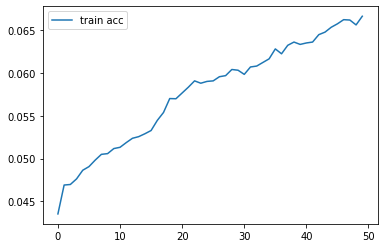

<Figure size 432x288 with 0 Axes>

In [49]:
# plot the accuracy for 1D ConvNet
plt.plot(history_1D.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [51]:
# output generation
model = model_1D
seed_text = "look at her face"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

look at her face of livin hes voices holler in a a same face away roll hide come nothing star neon get dance were fiddle ride sigh shining sight ahead sigh game belong ball south dream run own bugler while second little cmon along it no little home near able strong heart able knees world bit tiger told instead nights it twice again court whom tall theyre far my side a would today truth able nights dream lovelight ahead teacher seem stay do shining town floor crazy heart care away sound knees to neon warning choice dream sometimes soul smile light away wildest sea


# Used one-Dimensional ---model_1D for output generation it as more accuracy compared to other algorithm